<a href="https://colab.research.google.com/github/zeerafle/product-packaging/blob/main/notebook_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis: Product Packaging

Tujuan yang ingin dicapai dalam hands-on ini adalah:

1. 10 produk dengan transaksi tertinggi
2. 10 produk dengan transaksi terendah
3. 10 paket kombinasi produk yang paling menarik
4. Paket produk yang bisa dipasangkan dengan item slow-moving

## Setup

In [43]:
install.packages('arules')
install.packages('plyr')
install.packages('arulesViz')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘ca’, ‘registry’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [51]:
library(arules)
library(readxl)
library(tidyverse)
library(plyr)
library(arulesViz)

## Preprocessing

Dataset berisi transaksi yang terjadi pada tanggal 1 Desember 2009 sampai 9 Desember 2011. Barang yang dijual adalah perlengkapan kado-kado unik.

Setelah dataset di proses, ubah menjadi format transaksi. Lalu simpan ke file baru sehingga memudahkan proses selanjutnya

### Load Dataset

Dataset dapat diunduh di https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx

In [11]:
# download dataset
system('wget https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx')

In [18]:
# buat folder output
system('mkdir Output')

In [12]:
# baca file excel ke data frame
retail <- read_excel("online_retail_II.xlsx", "Year 2009-2010")
# buang missing values dengan fungsi na.omit()
retail <- na.omit(retail)
# edit tipe kolom dengan fungsi mutate
retail_new <- retail %>%
    # kolom description jadi factor
    mutate(Description = as.factor(Description)) %>%
    # kolom country jadi factor
    mutate(Date = as.Date(InvoiceDate)) %>%
    # edit kolom Invoice jadi numeric
    mutate(Invoice = as.numeric(Invoice))


Warning message in eval(cols[[col]], .data, parent.frame()):
“NAs introduced by coercion”


In [14]:
retail_new

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
<dbl>,<chr>,<fct>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>,<date>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01
489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,2009-12-01
489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01
489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,2009-12-01
489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,2009-12-01


### Buat menjadi format transaksi

In [15]:
transaction_data <- ddply(
    retail_new,
    c("Invoice", "Date"),
    function(df) paste(df$Description, collapse = ",")
)

# set kolom Invoice dan Date ke NULL
transaction_data$Invoice <- NULL
transaction_data$Date <- NULL
# ganti nama kolom jadi "items"
colnames(transaction_data) <- c("items")

### Simpan Hasil Preprocess

In [16]:
# simpan data transaksi ke file baru
write.csv(
    transaction_data,
    "market_basket_transaction.csv",
    quote = FALSE,
    row.names = FALSE
)

## Top 10 & Bottom 10

In [20]:
# baca file dalam class transaction
transaksi <- read.transactions(
    "market_basket_transaction.csv",
    quote = "",
    format = "basket",
    sep = ","
)

Warning message in asMethod(object):
“removing duplicated items in transactions”


In [24]:
# dapatkan frekuensi item
item <- itemFrequency(transaksi, type="absolute")

### Top 10 Item

In [25]:
# urutkan dari tertinggi
item_desc <- sort(item, decreasing = TRUE)
# ambil 10 teratas
item_desc <- item_desc[1:10]
# masukkan hasilnya ke data frame
item_desc <- data.frame(
    "Nama Produk" = names(item_desc),
    "Jumlah" = item_desc,
    row.names = NULL
)

In [26]:
item_desc

Nama.Produk,Jumlah
<chr>,<int>
WHITE HANGING HEART T-LIGHT HOLDER,3101
REGENCY CAKESTAND 3 TIER,1778
STRAWBERRY CERAMIC TRINKET BOX,1425
ASSORTED COLOUR BIRD ORNAMENT,1340
HOME BUILDING BLOCK WORD,1184
PACK OF 72 RETRO SPOT CAKE CASES,1168
60 TEATIME FAIRY CAKE CASES,1142
JUMBO BAG RED RETROSPOT,1085
LUNCH BAG RED SPOTTY,1083


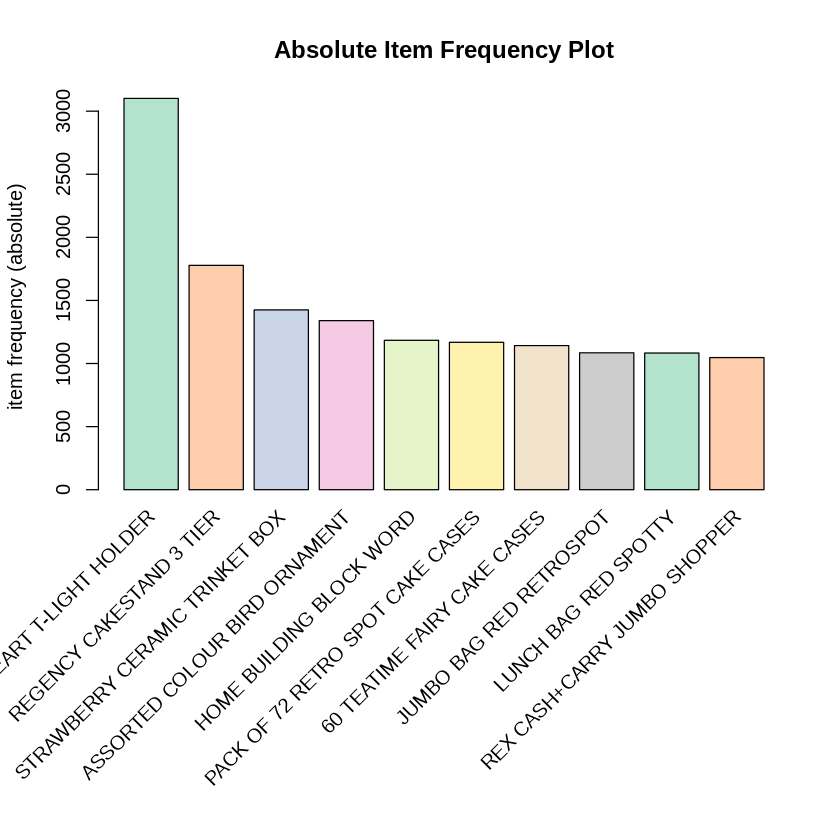

In [38]:
# Create an item frequency plot for the top 20 items
if (!require("RColorBrewer")) {
  # install color package of R
install.packages("RColorBrewer")
#include library RColorBrewer
library(RColorBrewer)
}
itemFrequencyPlot(transaksi,topN=10,type="absolute",col=brewer.pal(8,'Pastel2'), main="Absolute Item Frequency Plot")

Bottom 10 item

In [27]:
item_asc <- sort(item)
# ambil 10 terbawah
item_asc <- item_asc[1:10]
# masukkan hasilnya ke data frame
item_asc <- data.frame(
    "Nama Produk" = names(item_asc),
    "Jumlah" = item_asc,
    row.names = NULL
)

In [28]:
item_asc

Nama.Produk,Jumlah
<chr>,<int>
10 COLOURS - SPACEBOY,1
11 PC CERAMIC TEA SET POLKADOT,1
3 BIRDS CANVAS SCREEN,1
6 HOOK JEWEL STAND LILAC DRESS,1
ACRYLIC BEAD CHAIN,1
Adjustment by Peter on 24/05/2010 1,1
AMBER BERTIE GLASS BEAD BAG CHARM,1
AMBER CRYSTAL DROP EARRINGS,1
AMBER DROP EARRINGS W LONG BEADS,1


In [ ]:
write.csv(item, file = "Output/top10_item_retail.txt")

## Mendapatkan Kombinasi Produk yang Menarik

Beberapa aturan yang bisa kita terapkan untuk menghasilkan kombinasi produk sesuai keinginan:

- Jumlah maksimal dan minimal item dalam satu kombinasi
- min_support
- min_confidence

In [29]:
# baca file dalam class transaction
transaksi <- read.transactions(
    "market_basket_transaction.csv",
    quote = "",
    format = "basket",
    sep = ","
)

Warning message in asMethod(object):
“removing duplicated items in transactions”


In [30]:
# Kombinasi produk minimal 2 item, dan maksimum 3 item
# Kombinasi produk itu muncul setidaknya 10 dari dari seluruh transaksi => 10/length(transaksi)
# Memiliki tingkat confidence minimal 50 persen
mba <- apriori(
    transaksi,
    parameter = list(
        supp = 10 / length(transaksi),
        conf = 0.5,
        maxlen = 3,
        minlen = 2
    )
)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime      support minlen
        0.5    0.1    1 none FALSE            TRUE       5 0.0005123213      2
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4461 item(s), 19519 transaction(s)] done [0.18s].
sorting and recoding items ... [3392 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3

Warning message in apriori(transaksi, parameter = list(supp = 10/length(transaksi), :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [1.45s].
writing ... [181568 rule(s)] done [0.23s].
creating S4 object  ... done [0.08s].


In [31]:
# buang rules yang tidak perlu (rules yang ada di dalam rule yang lebih besar)
# vector yang berisi posisi rules yang berulang
rule_subset <- which(colSums(is.subset(mba, mba)) > 1)
# buang rule_subset
clean_mba <- mba[-rule_subset]

In [34]:
# itemset yang memiliki asosiasi atau hubungan erat teratas (10)
# filter berdasarkan lift
filtered_rules <- head(clean_mba, n = 10, by = "lift")

In [40]:
inspect(filtered_rules)

     lhs                                      rhs                                      support confidence     coverage     lift count
[1]  {GREEN EASTER EGG HUNT START POST}    => {YELLOW EASTER EGG HUNT START POST} 0.0005123213  0.7692308 0.0006660177 682.4825    10
[2]  {PIN CUSHION BABUSHKA BLUE}           => {PIN CUSHION BABUSHKA PINK}         0.0005123213  0.7142857 0.0007172499 633.7338    10
[3]  {YELLOW COAT RACK PARIS FASHION}      => {BLUE COAT RACK PARIS FASHION}      0.0006147856  0.7500000 0.0008197141 563.0481    12
[4]  {VINTAGE ROSE BEAD BRACELET RASPBERR} => {VINTAGE ROSE BEAD BRACELET BLACK}  0.0005123213  0.6250000 0.0008197141 554.5170    10
[5]  {BLUE EASTER EGG HUNT START POST}     => {YELLOW EASTER EGG HUNT START POST} 0.0005123213  0.6250000 0.0008197141 554.5170    10
[6]  {RETRO BROWN BALL ASHTRAY}            => {RETRO PINK BALL ASHTRAY}           0.0005123213  0.6666667 0.0007684820 520.5067    10
[7]  {WHITE MURANO TWIST BRACELET}         => {PINK MURANO TWI

In [ ]:
# masukkan hasil ke dalam file
write(filtered_rules, file="Output/kombinasi_retail.txt")

### Visualisasi Association Rules

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



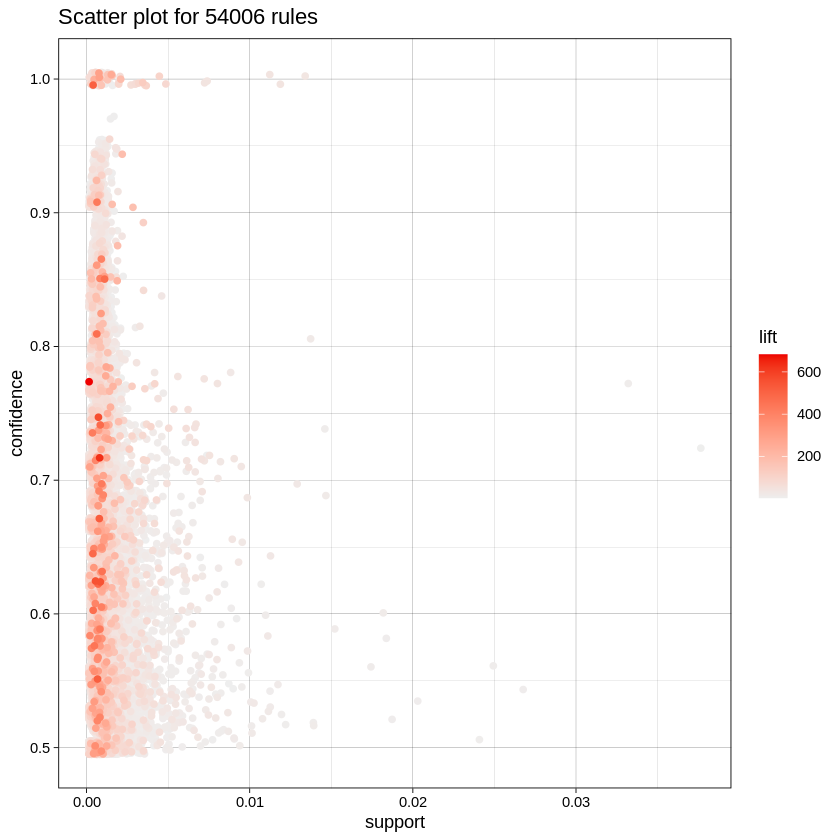

In [45]:
# Filter rules with confidence greater than 0.4 or 40%
subRules <- clean_mba[quality(clean_mba)$confidence>0.4]
#Plot SubRules
plot(subRules)

In [54]:
# visualisasi graf
top10subRules <- head(subRules, n=10, by='confidence')

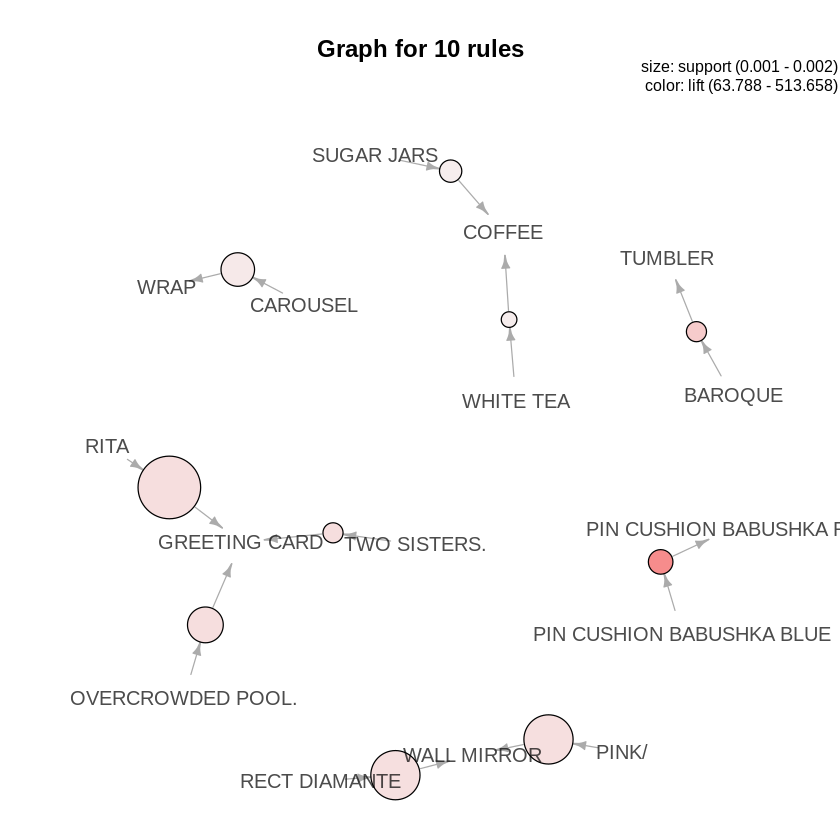

In [62]:
plot(top10subRules, method = "graph", engine = 'igraph')

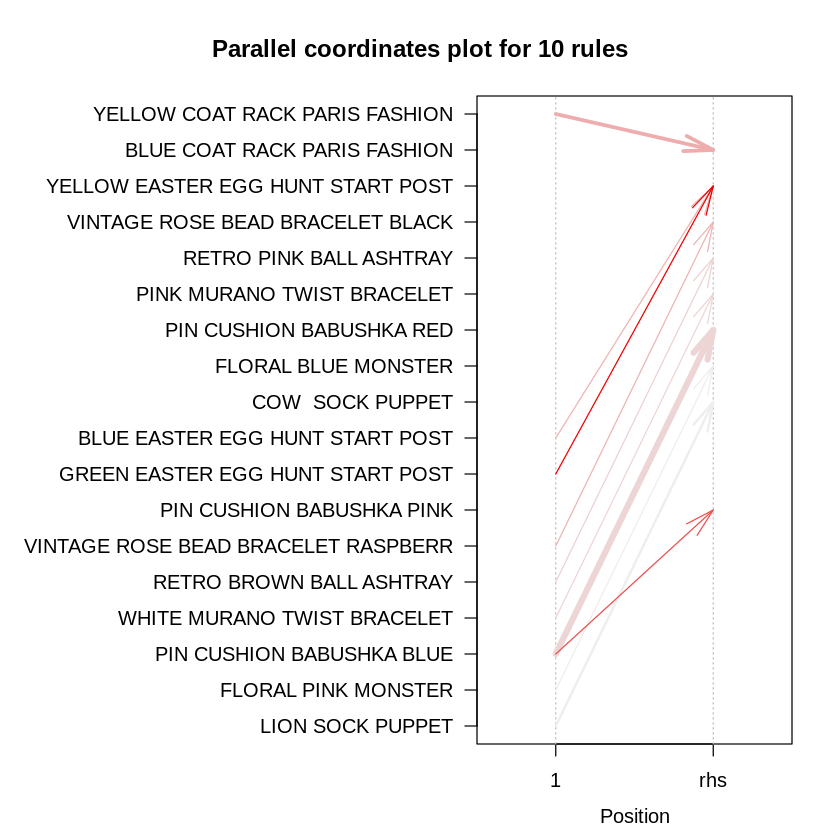

In [64]:
# Filter top 20 rules with highest lift
subRules2<-head(subRules, n=10, by="lift")
plot(subRules2, method="paracoord")

## Paket yang bisa dipasangkan dengan item slow-moving

Slow-moving item adalah produk yang pergerakan penjualannya lambat.

Item ini belum tentu tidak laku, mungkin hanya tidak cocok jika dijual satuan atau memang harganya yang tidak cocok. Maka dari itu perlu dicari asosiasi yang kuat dari item produk ini dengan produk lain sehingga jika dipaketkan akan lebih menarik.

In [70]:
# anggaplah 3D TRADITIONAL CHRISTMAS STICKERS dan HEART T-LIGHT HOLDER ingin dicari kombinasi yang bagus untuk dipaketkan
# maka produk yang diinginkan harus berada di rhs
# temukan 3 rules yang paling kuat untuk masing masing produk
xmas_stickers <- head(
    subset(clean_mba, rhs %ain% "3D TRADITIONAL CHRISTMAS STICKERS"),
    n = 3,
    by = "lift"
)
amber_crystal <- head(
    subset(clean_mba, rhs %ain% "AMBER CRYSTAL DROP EARRINGS"),
    n = 3,
    by = "lift"
)

In [67]:
inspect(xmas_stickers)

    lhs                                rhs                                      support confidence     coverage     lift count
[1] {3D CHRISTMAS STAMPS STICKERS,                                                                                            
     POPPY'S PLAYHOUSE KITCHEN}     => {3D TRADITIONAL CHRISTMAS STICKERS} 0.0005123213  0.7142857 0.0007172499 154.9127    10
